<a href="https://colab.research.google.com/github/Sushmitha-Katti/ERA/blob/main/Session%207%20-%20In-Depth%20Coding%20Practice/Drill3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code Drill 3
  * Target
     * Used Image Agumentation: Random Rotation
     * Reduced the number of parameters to reach the 8k parameters goal
     * Reduced the number of epochs to 15 to reach 15 epochs goal
     * Shifted the max pooling after the receptive fied 7
     * Increased Dropout to 0.2
  * Result
    * Parameters: 7,674
    * Epochs: 15
    * Best Training Accuracy: 99.05
    * Best Test Accuracy: 99.41
  * Analysis
    * Reached the target once.
    * Training is still harder. Can be made slightly easier

# Import Libraries

In [ ]:
# To reload the disk files
%load_ext autoreload
%autoreload 2

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([

                                        transforms.RandomRotation((-7.0, 7.0), fill=(1,)),

                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? False


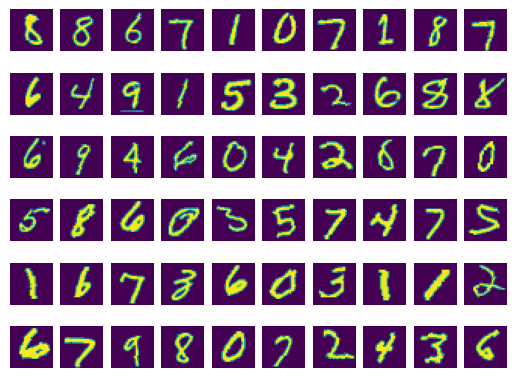

In [ ]:
from utils import plot_images
dataiter = iter(train_loader)
images, labels = next(dataiter)
plot_images(60, images)

# Model Params


In [ ]:
from models.model3 import Model3
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model3().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
         Dropout2d-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
         Dropout2d-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 12, 22, 22]           1,080
             ReLU-10           [-1, 12, 22, 22]               0
      BatchNorm2d-11           [-1, 12, 22, 22]              24
        Dropout2d-12           [-1, 12, 22, 22]               0


# Model Training and Testing

In [ ]:
from torch.optim.lr_scheduler import StepLR
from train_test import TrainTest
train_test_instance = TrainTest()

model =  Model3().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_loader), epochs=15)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train_test_instance.train(model, device, train_loader, optimizer, epoch)
    # scheduler.step()
    train_test_instance.test(model, device, test_loader)

EPOCH: 1


Loss=0.021207965910434723 Batch_id=937 Accuracy=91.16: 100%|██████████| 938/938 [01:33<00:00, 10.02it/s]



Test set: Average loss: 0.0568, Accuracy: 9841/10000 (98.41%)

EPOCH: 2


Loss=0.4501231610774994 Batch_id=937 Accuracy=97.63: 100%|██████████| 938/938 [01:35<00:00,  9.87it/s]



Test set: Average loss: 0.0360, Accuracy: 9887/10000 (98.87%)

EPOCH: 3


Loss=0.036044396460056305 Batch_id=937 Accuracy=98.19: 100%|██████████| 938/938 [01:32<00:00, 10.10it/s]



Test set: Average loss: 0.0337, Accuracy: 9890/10000 (98.90%)

EPOCH: 4


Loss=0.052549198269844055 Batch_id=937 Accuracy=98.33: 100%|██████████| 938/938 [01:31<00:00, 10.23it/s]



Test set: Average loss: 0.0297, Accuracy: 9900/10000 (99.00%)

EPOCH: 5


Loss=0.009692122228443623 Batch_id=937 Accuracy=98.56: 100%|██████████| 938/938 [01:30<00:00, 10.32it/s]



Test set: Average loss: 0.0266, Accuracy: 9917/10000 (99.17%)

EPOCH: 6


Loss=0.04234521836042404 Batch_id=937 Accuracy=98.61: 100%|██████████| 938/938 [01:32<00:00, 10.12it/s]



Test set: Average loss: 0.0265, Accuracy: 9918/10000 (99.18%)

EPOCH: 7


Loss=0.0025192690081894398 Batch_id=937 Accuracy=98.70: 100%|██████████| 938/938 [01:32<00:00, 10.12it/s]



Test set: Average loss: 0.0266, Accuracy: 9909/10000 (99.09%)

EPOCH: 8


Loss=0.014608488418161869 Batch_id=937 Accuracy=98.74: 100%|██████████| 938/938 [01:31<00:00, 10.26it/s]



Test set: Average loss: 0.0247, Accuracy: 9926/10000 (99.26%)

EPOCH: 9


Loss=0.06857437640428543 Batch_id=937 Accuracy=98.85: 100%|██████████| 938/938 [01:33<00:00, 10.03it/s]



Test set: Average loss: 0.0233, Accuracy: 9924/10000 (99.24%)

EPOCH: 10


Loss=0.11458776891231537 Batch_id=937 Accuracy=98.87: 100%|██████████| 938/938 [01:31<00:00, 10.29it/s]



Test set: Average loss: 0.0260, Accuracy: 9921/10000 (99.21%)

EPOCH: 11


Loss=0.0847199484705925 Batch_id=937 Accuracy=98.89: 100%|██████████| 938/938 [01:29<00:00, 10.51it/s]



Test set: Average loss: 0.0214, Accuracy: 9931/10000 (99.31%)

EPOCH: 12


Loss=0.003649670397862792 Batch_id=937 Accuracy=98.94: 100%|██████████| 938/938 [01:31<00:00, 10.22it/s]



Test set: Average loss: 0.0232, Accuracy: 9923/10000 (99.23%)

EPOCH: 13


Loss=0.012663321569561958 Batch_id=937 Accuracy=99.02: 100%|██████████| 938/938 [01:31<00:00, 10.29it/s]



Test set: Average loss: 0.0201, Accuracy: 9935/10000 (99.35%)

EPOCH: 14


Loss=0.0017420841613784432 Batch_id=937 Accuracy=99.05: 100%|██████████| 938/938 [01:31<00:00, 10.25it/s]



Test set: Average loss: 0.0205, Accuracy: 9944/10000 (99.44%)

EPOCH: 15


Loss=0.0034798874985426664 Batch_id=937 Accuracy=99.08: 100%|██████████| 938/938 [01:30<00:00, 10.39it/s]



Test set: Average loss: 0.0223, Accuracy: 9929/10000 (99.29%)



# Loss and Accuaracy

Text(0.5, 1.0, 'Test Accuracy')

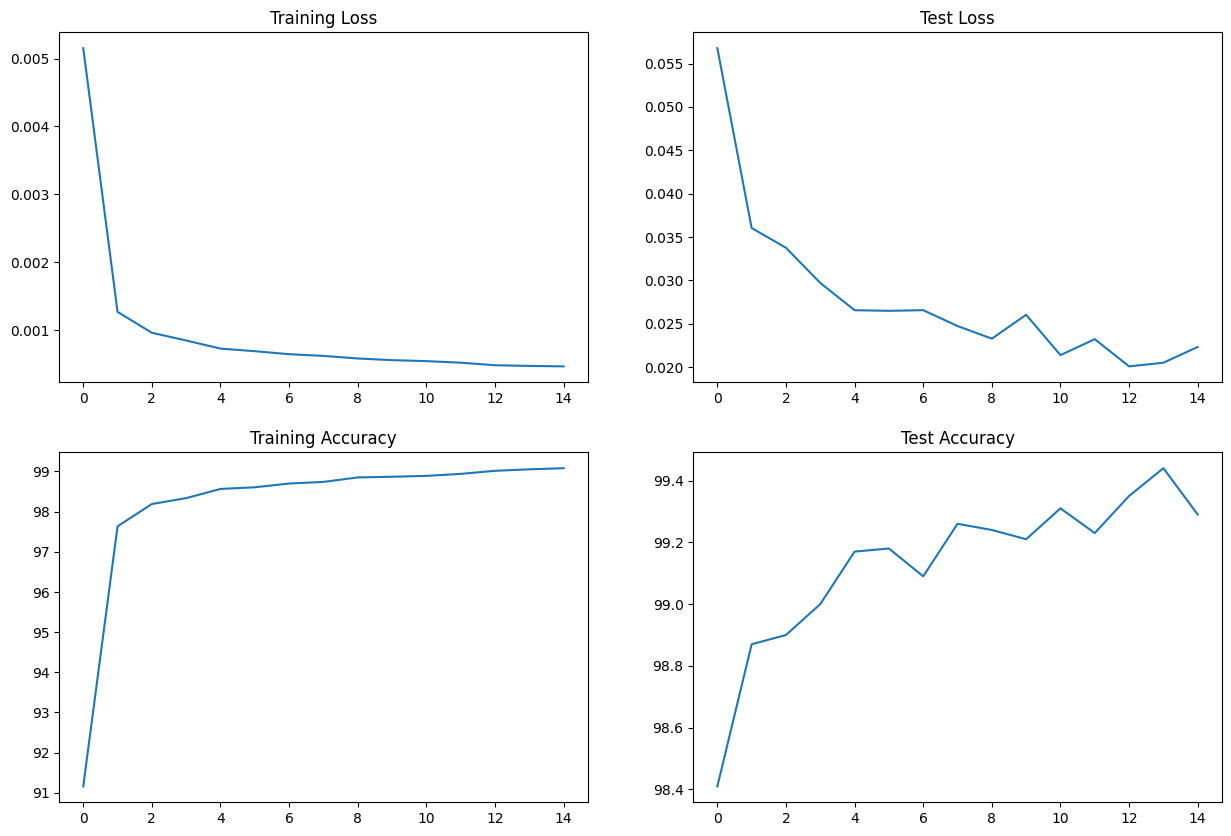

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_test_instance.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_test_instance.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(train_test_instance.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(train_test_instance.test_acc)
axs[1, 1].set_title("Test Accuracy")